<a href="https://colab.research.google.com/github/aminfazy/basic_MLDL/blob/main/Feed_forward_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## A simple feed forward network for MNIST image classification

In [1]:
# Import the required packages
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
from matplotlib import pyplot as plt 

Using TensorFlow backend.


In [2]:
# Get the training data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print('Training data shape : ', train_images.shape, train_labels.shape)

print('Testing data shape : ', test_images.shape, test_labels.shape)


11501568/11490434 [==============================] - 2s 0us/step
('Training data shape : ', (60000, 28, 28), (60000,))
('Testing data shape : ', (10000, 28, 28), (10000,))


In [5]:

# Find the unique numbers from the train labels
classes = np.unique(train_labels)
classes_num = len(classes)
print('Unique output classes : ', classes)
print('Total number of outputs : ', classes_num)

('Output classes : ', array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))
('Total number of outputs : ', 10)


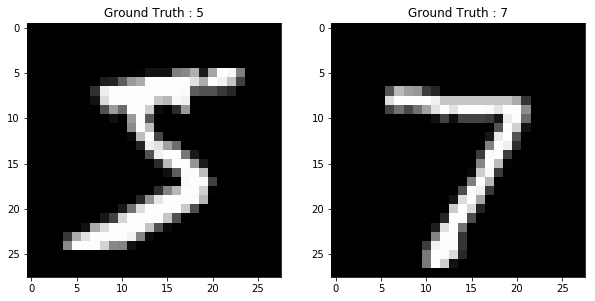

In [10]:
# let's see some sample images in the dataset

# Define the plot size 
plt.figure(figsize=[10,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))
plt.show()

In [12]:
# Change the image format from 2D array of size 28x28 to 1D arrya of size 784
print(train_images.shape)

(60000, 28, 28)


In [15]:
# Get the size of required 1D array

dim_data = np.prod(train_images.shape[1:])
print(dim_data)

784


In [16]:
# Now reshape the 2D array to 1D array

train_data = train_images.reshape(train_images.shape[0], dim_data)
test_data = test_images.reshape(test_images.shape[0], dim_data)

In [17]:
# Change to float datatype

train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

In [28]:
# Change the labels from integer to categorical data

train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# Check how the one hot encoded labels look like
print(test_labels_one_hot[0:10])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [22]:
# Define the model

model = Sequential() # type of model

# Define the model layers

model.add(Dense(512, activation='relu', input_shape=(dim_data,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(classes_num, activation='softmax'))

# Compile the model

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [23]:
# Let's see how the model looks and check the parameters

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [33]:
# Now we can start the training

history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=2, verbose =1,  
                   validation_data=(test_data, test_labels_one_hot))

## Evaluate the model

In [34]:
# let's run the trained model on test data and see how it performs

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

10000/10000 [==============================] - 1s 65us/step
Evaluation result on Test Data : Loss = 0.278783311943, accuracy = 0.969099998474


## Run the sample predictions

Probability of all the classes: [[0.0000000e+00 3.8584561e-12 1.0000000e+00 9.7661265e-29 0.0000000e+00
  0.0000000e+00 1.7985287e-35 6.0849539e-33 1.1989075e-32 0.0000000e+00]]
Model prediction: [2]


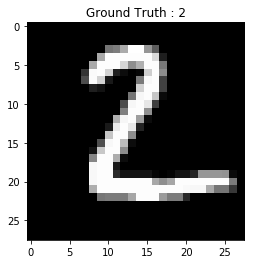

In [43]:
# Predict the most likely class

print("Probability of all the classes: {}".format(model.predict(test_data[[1],:])))

print("Model prediction: {}".format(model.predict_classes(test_data[[1],:])))

# Display the predicted image
plt.imshow(test_images[1], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[1]))
plt.show()

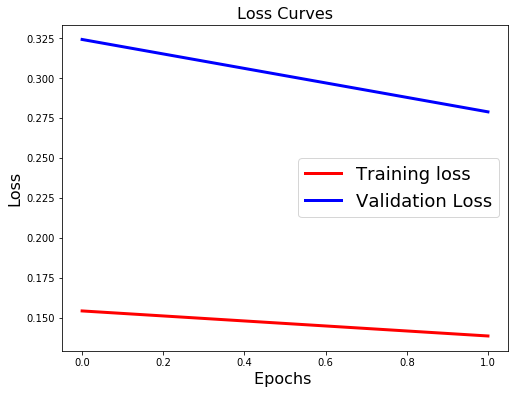

In [48]:
# Let us observe the training over the epochs

#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.show()

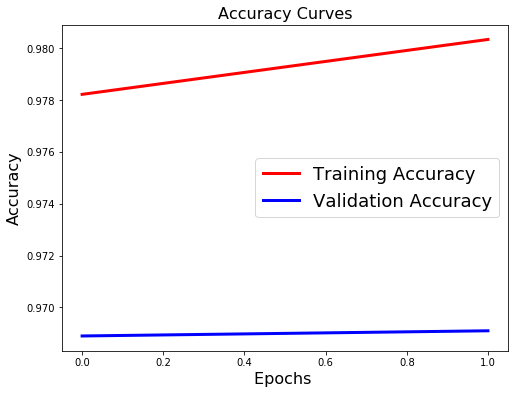

In [50]:

#Plot the Accuracy Curves

plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16) 
plt.title('Accuracy Curves',fontsize=16)
plt.show()